<a href="https://colab.research.google.com/github/keedjk7/Machine-Learning/blob/main/Activity2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv",sep=",")
df_base = df
df

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,8,One year,Yes,84.80,1990.50,No
7039,2234-XADUH,Female,0,72,7,One year,Yes,103.20,7362.90,No
7040,4801-JZAZL,Female,0,11,2,Month-to-month,Yes,29.60,346.45,No
7041,8361-LTMKD,Male,1,4,3,Month-to-month,Yes,74.40,306.60,Yes


In [ ]:
df.shape

(7043, 10)

In [ ]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen  tenure  ServiceCount        Contract  \
0     7590-VHVEG  Female              0       1             2  Month-to-month   
1     5575-GNVDE    Male              0      34             4        One year   
2     3668-QPYBK    Male              0       2             4  Month-to-month   
3     7795-CFOCW    Male              0      45             4        One year   
4     9237-HQITU  Female              0       2             2  Month-to-month   
...          ...     ...            ...     ...           ...             ...   
7038  6840-RESVB    Male              0      24             8        One year   
7039  2234-XADUH  Female              0      72             7        One year   
7040  4801-JZAZL  Female              0      11             2  Month-to-month   
7041  8361-LTMKD    Male              1       4             3  Month-to-month   
7042  3186-AJIEK    Male              0      66             7        Two year

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
tenure                int64
ServiceCount          int64
Contract             object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
df = df.drop(labels = 'customerID', axis=1)
df = df.drop(labels = 'SeniorCitizen', axis =1)
df

,gender,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,1,2,Month-to-month,Yes,29.85,29.85,No
1,Male,34,4,One year,No,56.95,1889.50,No
2,Male,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,Male,45,4,One year,No,42.30,1840.75,No
4,Female,2,2,Month-to-month,Yes,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...
7038,Male,24,8,One year,Yes,84.80,1990.50,No
7039,Female,72,7,One year,Yes,103.20,7362.90,No
7040,Female,11,2,Month-to-month,Yes,29.60,346.45,No
7041,Male,4,3,Month-to-month,Yes,74.40,306.60,Yes


In [ ]:
df.info

<bound method DataFrame.info of       gender  tenure  ServiceCount        Contract PaperlessBilling  \
0     Female       1             2  Month-to-month              Yes   
1       Male      34             4        One year               No   
2       Male       2             4  Month-to-month              Yes   
3       Male      45             4        One year               No   
4     Female       2             2  Month-to-month              Yes   
...      ...     ...           ...             ...              ...   
7038    Male      24             8        One year              Yes   
7039  Female      72             7        One year              Yes   
7040  Female      11             2  Month-to-month              Yes   
7041    Male       4             3  Month-to-month              Yes   
7042    Male      66             7        Two year              Yes   

      MonthlyCharges  TotalCharges Churn  
0              29.85         29.85    No  
1              56.95       18

In [ ]:
df.dtypes

gender               object
tenure                int64
ServiceCount          int64
Contract             object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
count_nan = df.isnull().sum()
count_nan

gender               0
tenure               0
ServiceCount         0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        27
Churn                0
dtype: int64

In [ ]:
df['TotalCharges'].fillna( 0 , inplace=True)

## Remove variales with high variable corr

In [ ]:
column = ['tenure', 'ServiceCount', 'MonthlyCharges', 'TotalCharges']

In [ ]:
dataCorr = df.corr()

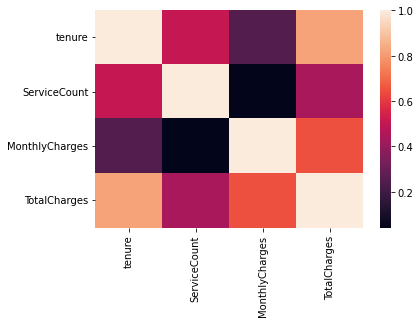

In [ ]:
sns.heatmap(dataCorr)

In [ ]:
lower = pd.DataFrame(np.tril(dataCorr,-1),columns= dataCorr.columns)
to_drop = [column for column in lower if any(lower[column] > 0.6)]
df.drop(to_drop, inplace=True, axis=1)
df

,gender,ServiceCount,Contract,PaperlessBilling,TotalCharges,Churn
0,Female,2,Month-to-month,Yes,29.85,No
1,Male,4,One year,No,1889.50,No
2,Male,4,Month-to-month,Yes,108.15,Yes
3,Male,4,One year,No,1840.75,No
4,Female,2,Month-to-month,Yes,151.65,Yes
...,...,...,...,...,...,...
7038,Male,8,One year,Yes,1990.50,No
7039,Female,7,One year,Yes,7362.90,No
7040,Female,2,Month-to-month,Yes,346.45,No
7041,Male,3,Month-to-month,Yes,306.60,Yes


In [ ]:
df.describe()

,ServiceCount,TotalCharges
count,7043.000000,7043.000000
mean,5.446259,2273.838648
std,1.964916,2265.554957
min,1.000000,0.000000
25%,4.000000,392.575000
50%,6.000000,1389.350000
75%,7.000000,3778.050000
max,9.000000,8684.800000


## Remove Variable with High p-value from Chi-square

In [ ]:
column = ['Churn']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
churn_category = label_encoder.fit_transform(df_base['Churn'])
churn_category = pd.DataFrame(churn_category,columns=['churn_category'])
churn_category

,churn_category
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [ ]:
Output = churn_category
# Variables = ['gender', 'Contract', 'PaperlessBilling']
Variables = df[['gender', 'Contract', 'PaperlessBilling']]
gender_category = label_encoder.fit_transform(Variables['gender'])
contract_category = label_encoder.fit_transform(Variables['Contract'])
paperBill_category = label_encoder.fit_transform(Variables['PaperlessBilling'])
gender = pd.DataFrame(gender_category, columns=['gender'])
contract = pd.DataFrame(contract_category, columns=['Contract'])
paperBill = pd.DataFrame(paperBill_category, columns=['PaperlessBilling'])
variables_category = gender
variables_category = variables_category.join(contract)
variables_category = variables_category.join(paperBill)
variables_category

,gender,Contract,PaperlessBilling
0,0,0,1
1,1,1,0
2,1,0,1
3,1,1,0
4,0,0,1
...,...,...,...
7038,1,1,1
7039,0,1,1
7040,0,0,1
7041,1,0,1


In [ ]:
# from  scipy.stats import chi2
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
Chi_table = chi2(variables_category, Output)
Chi_table

(array([2.58698618e-01, 1.11578017e+03, 1.05680863e+02]),
 array([6.11015635e-001, 1.22794132e-244, 8.66198711e-025]))

In [ ]:
p_value = Chi_table[1]
p_value

array([6.11015635e-001, 1.22794132e-244, 8.66198711e-025])

In [ ]:
# p_value = pd.DataFrame(p_value)
# p_value
to_drop = [column for column in lower if any(p_value(column) > 0.05)]

TypeError: ignored

In [ ]:
df_new = df[['ServiceCount', 'TotalCharges']]
df_new = df_new.join(gender)
df_new = df_new.join(paperBill)
df_new = df_new.join(contract)
df_new = df_new.join(churn_category)
df_new

,ServiceCount,TotalCharges,gender,PaperlessBilling,Contract,churn_category
0,2,29.85,0,1,0,0
1,4,1889.50,1,0,1,0
2,4,108.15,1,1,0,1
3,4,1840.75,1,0,1,0
4,2,151.65,0,1,0,1
...,...,...,...,...,...,...
7038,8,1990.50,1,1,1,0
7039,7,7362.90,0,1,1,0
7040,2,346.45,0,1,0,0
7041,3,306.60,1,1,0,1
